In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mnist_utils as mu
import random
import pyNN.nest as p
import relu_utils as alg
import spiking_relu as sr
import cnn_utils as cnnu

In [2]:
import scipy.io as sio
tmp_x = sio.loadmat('mnist.mat')['test_x']
tmp_x = np.transpose(tmp_x, (2, 0, 1))
tmp_x = np.reshape(tmp_x, (tmp_x.shape[0], 28*28), order='F' )

tmp_y = sio.loadmat('mnist.mat')['test_y']
tmp_y = np.argmax(tmp_y, axis=0)

11.7395207513


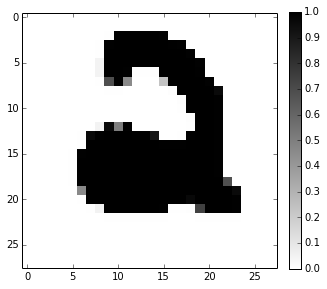

In [3]:
num_train = 100
tx = tmp_x[0:num_train]
mu.plot_digit(tx[0])
ty = tmp_y[0:num_train]

SUM_rate = 2000.
for i in range(num_train):
    tx[i] = tx[i]/sum(tx[i])*SUM_rate

print max(tx[0])

In [4]:
w, l = cnnu.readmat('cnn_relu.mat')#cnn609.mat softplus 3-5 train.
r = cnnu.test(w, l, tx)

In [5]:
label = ty[:num_train]
result_cnn = np.argmax(r[-1][0], axis=1)
print (result_cnn == label).astype(int).sum()

92


In [6]:
w_new, a = cnnu.scale_weight(w, l, tx)

scale:  19.5195085411
scale:  10.208631392
scale:  7.36131464507
0.0736633068326
scale:  14.1303782321
49.392420307
scale:  2.83610781963
50.0


In [7]:
result_snn = np.argmax(a, axis=1)
result_cnn = np.argmax(r[-1][0], axis=1)
label = ty[:num_train]
print (result_snn == label).astype(int).sum(), (result_cnn == label).astype(int).sum()

92 92


In [9]:
np.max(a,axis=1)

array([  58.18363753,  127.94644461,   41.32687471,   46.72042999,
         57.58084911,  147.04476062,   42.02611339,   59.14325466,
         78.19239618,   41.70852777,   73.13256442,  103.78833279,
         80.79783172,   98.99843797,  103.31807647,   96.89890185,
         98.78612184,   70.02473523,   12.11962647,   40.27220343,
         51.44871457,   91.77814779,  113.41431931,   42.84016324,
        107.40137932,   53.216516  ,   63.11385834,   94.91976045,
         43.00272458,   54.42091261,   95.33449407,   77.20088552,
        105.0442787 ,   32.59661032,   59.61195095,   37.90182617,
         61.42050617,   92.91497263,   98.48809498,   54.64224115,
         85.27115362,   27.41528054,   41.04251575,   21.57988057,
         71.31139429,   50.40956093,   99.4355336 ,   90.13073924,
        101.40467193,  175.87458228,   78.17711273,   33.43251801,
         79.6879155 ,   68.19290903,   93.810369  ,  115.19198919,
         74.19024595,   41.60713746,   80.83291336,   86.02007

In [22]:
np.save('cnn_relu', w_new)

In [16]:
def plot_digit(img_raw):
    #img_raw = np.uint8(img_raw)
    plt.figure(figsize=(5,5))
    im = plt.imshow(np.reshape(img_raw,(24,24)), cmap=cm.gray_r,interpolation='none')
    plt.colorbar(im, fraction=0.046, pad=0.04)

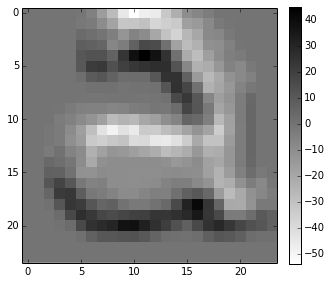

In [19]:
y = cnnu.conv2d(tx[0:1], w[0][0][1])
plot_digit(y)

In [19]:
out_size = 24
in_size = 28
k_size = 5
x = np.reshape(tx[0],(in_size, in_size))#,order='F'
k = w[0][0][0]
z = np.zeros((out_size,out_size))
conn_list = []
for x_ind in range(out_size):
    for y_ind in range(out_size):
        in_ind = x_ind * in_size + y_ind
        for kx in range(k_size):
            for ky in range(k_size):
                z[x_ind][y_ind] += (k[k_size-1-ky][k_size-1-kx] * x[x_ind+kx][y_ind+ky])
                out_ind = (x_ind+kx) * out_size + (y_ind+ky)
                conn_list.append((in_ind, out_ind, k[k_size-1-ky][k_size-1-kx]))
z =  np.reshape(z, (1, out_size*out_size))#z =  np.reshape(z, (1, 24*24))#


In [13]:
L = l


1 6
6 6
6 12
12 12
12 10


In [9]:
L

[[1, 28], [6, 5], [0, 2], [12, 5], [0, 2], [-1, 10]]